In [217]:
#import library to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import tensorflow as tf

%matplotlib inline

In [218]:
# read the file
cancer = pd.read_csv("risk_factors_cervical_cancer.csv")
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [219]:
# data
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [220]:
# Check missing value
# Turn "?" symbol into missing value
missing_value = ["?", np.nan]
cancer = pd.read_csv("risk_factors_cervical_cancer.csv", na_values=missing_value)

cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [221]:
# remove unwanted column name
col = (['Smokes', 'IUD', 'STDs', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx','STDs (number)'])
cancer = cancer.drop(columns = col)

# merge certain columns
columns_toMerge = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
cancer['Result_Diagnosed'] = cancer[columns_toMerge].sum(axis=1)

# drop columns that are already merged
cancer = cancer.drop(columns = columns_toMerge)
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Result_Diagnosed
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [222]:
cancer.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Result_Diagnosed'],
      dtype='object')

In [223]:
#fill the null value with data's mean and median
datamean = cancer.fillna(cancer.mean())
datamedian = cancer.fillna(cancer.median())

#round the float value into 2 decimal values
datamean = datamean.round(decimals = 2)
datamedian = datamedian.round(decimals = 2)

datamean.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Result_Diagnosed
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [224]:
#using mean to fill the null value,checking the null value existent
datamean.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Result_Diagnosed                      0


In [225]:
#DATA ANALYSIS
y_variable=['Diagnosed'] #Create columns for y variables
#Create columns for non-boolean x variables
X_col_new = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Hormonal Contraceptives (years)','IUD (years)'] 
x_var = datamean[X_col_new] #Create new dataset for non-boolean x variables
x_var

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Hormonal Contraceptives (years),IUD (years)
0,18,4.0,15.0,1.0,0.00,0.0
1,15,1.0,14.0,1.0,0.00,0.0
2,34,1.0,17.0,1.0,0.00,0.0
3,52,5.0,16.0,4.0,3.00,0.0
4,46,3.0,21.0,4.0,15.00,0.0
...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.00,0.0
854,32,2.0,19.0,1.0,8.00,0.0
855,25,2.0,17.0,0.0,0.08,0.0
856,33,2.0,24.0,2.0,0.08,0.0


In [226]:
#Method to look for outliers using z-score

def detect_outliers_zscore(x_data, threshold):
    """
    Detect outliers in the given x-variables using z-scores.   
    Args:
        x_data (array-like): The input x-variables data.
        threshold (float): The z-score threshold for determining outliers.
        Data points with z-scores greater than the threshold are considered outliers.
    Returns:
        array: Boolean array indicating whether each x-data point is an outlier (True) or not (False).
    """
    x_mean = np.mean(x_data, axis=0)
    x_std = np.std(x_data, axis=0)
    z_scores = np.abs((x_data - x_mean) / x_std)
    outliers = z_scores > threshold
    return outliers

#Look for outliers in x_var (threshold value can be modified)
outliers = detect_outliers_zscore(x_var, threshold=3)
outliers

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Hormonal Contraceptives (years),IUD (years)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
853,False,False,False,False,False,False
854,False,False,False,False,False,False
855,False,False,False,False,False,False
856,False,False,False,False,False,False


In [227]:
#Remove rows containing outliers in datamean
clean_data = datamean[~outliers.any(axis=1)] 
clean_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD (years),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Result_Diagnosed
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


# Model 1: Linear Regression


In [228]:
# Divide to features and target variable
x = clean_data.drop(columns = 'Result_Diagnosed')
y = clean_data['Result_Diagnosed']

# Split to train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Build model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

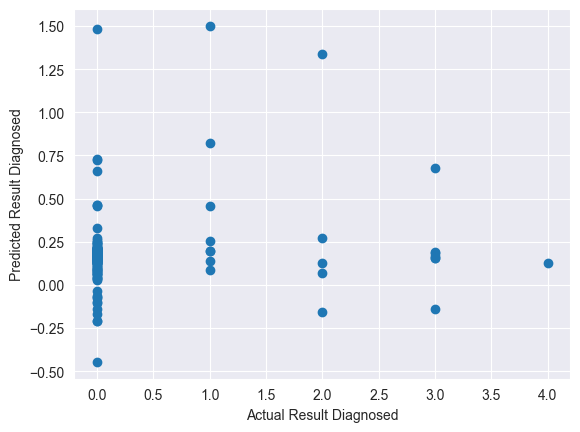

In [229]:
# Compare y predict and y test
y_pred_test = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Result Diagnosed")
plt.ylabel("Predicted Result Diagnosed")
plt.show()

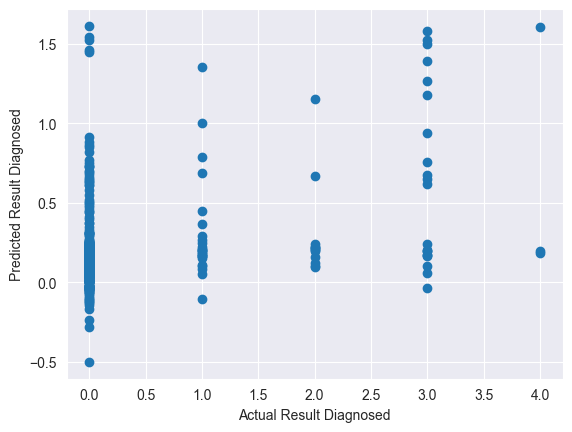

In [230]:
# Compare y predict and y train
y_pred_train = lr.predict(x_train)

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Result Diagnosed")
plt.ylabel("Predicted Result Diagnosed")
plt.show()

In [231]:
# Evaluate model
r2score_test = r2_score(y_test, y_pred_test)
r2score_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("R sq (Test):",r2score_test)
print("MSE (Test):",mse_test)
print("R sq (Train):",r2score_train)
print("MSE (Train):",mse_train)

R sq (Test): -0.028355338987025025
MSE (Test): 0.6343316855304938
R sq (Train): 0.13120913356086594
MSE (Train): 0.40794178786733937


# Model 2: Logistic regression

In [232]:
# Build model
model_logistic = LogisticRegression()

# Fit the training data
model_logistic.fit(x_train,y_train)

# Y_predict
y_pred = model_logistic.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8571428571428571


# Model 3: Neural network (FNN)

In [233]:
# Build model (2 hidden layers, 64,64 nodes )
model_NeuralNetwork = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_NeuralNetwork.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model_NeuralNetwork.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
20/20 [==============================] - 1s 1ms/step - loss: 0.7268 - accuracy: 0.7366
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.8943
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4977 - accuracy: 0.8976
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.8959
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.8943
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.8976
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.8976
Epoch 8/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8943
Epoch 9/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8959
Epoch 10/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8911


In [234]:
# Evaluate model
loss, accuracy = model_NeuralNetwork.evaluate(x_train,y_train)
print("accuracy",accuracy)
print("loss",loss)

20/20 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8976
accuracy 0.8975609540939331
loss 0.4405309557914734


In [235]:
# Hypertuning for FNN
# FNN 3
model_3 = MLPClassifier()

# Define parameter
hyperparameters = {
    'hidden_layer_sizes':[(64,0),(32,16),(8,4)],
    'activation':['relu','sigmoid'],
    'learning_rate':['constant','adaptive'],
    'max_iter':[10,20,30]
}

# Do cross-validation
grid_search = GridSearchCV(estimator=model_3,param_grid=hyperparameters,scoring='accuracy',cv=5)
grid_search.fit(x_train,y_train)

# Do prediction
y_pred = grid_search.best_estimator_.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("Best Hyperparameters:",grid_search.best_params_)
print("Best Accuracy:",accuracy)

Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (32, 16), 'learning_rate': 'constant', 'max_iter': 30}
Best Accuracy: 0.8975609756097561
